In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine =  create_engine('sqlite:///hawaii.sqlite')


In [6]:
#normally in sql or oter sw, the data type is assiociated with the column where the data is stored
#in sqlite the data type is bonded directly to the data in the cell
#data class means like data dype i.e. NUL,INTEGER,REAL,TEXT,BLOB(data stored exactly as its put)
#data storage class is more general than tata type, i.e. there can be several types of integer, but once data is retrieved 
#all type of integers are converted to 8-bit integer

#i think class is something like function

In [7]:
# reflect an existing database into a new model. 
#creates base class to automap schemas in alchemy.like foundation to build on it

Base = automap_base()
# reflect the tables, reflect the scehme of databasis
Base.prepare(engine, reflect = True)

In [8]:
# We can view all of the classes that automap found 
Base.classes.keys()

['measurement', 'station']

In [9]:
Base.classes.values()

[sqlalchemy.ext.automap.measurement, sqlalchemy.ext.automap.station]

In [10]:
# measurement and station are the classes, we dont want to type all the time Base.classes.<name> so we define Name = ....<name>
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
#prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#results = []
#results = session.query(Measurement.date, Measurement.prcp)
#print(results.all())

#results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#df = pd.DataFrame(results, columns=['date','precipitation'])
#df.set_index(df['date'], inplace=True)
#print(df)
#print(df.to_string(index=False))
#df = df.sort_index()
#print(df.to_string(index=False))
#df.plot()

start date: 2016-08-23
[('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08'

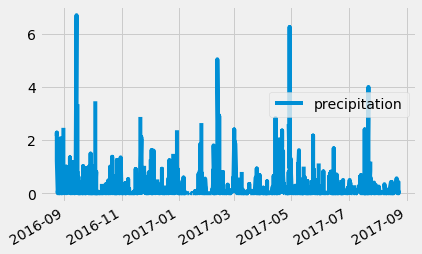

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

#Starting from the last data point in the database.

prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
#we set a tate 2017/08/23 and we want to calculate date 1 year before, so we substract 365 days using f-n dt.timedelta()

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(f'start date: {prev_year}')

# Perform a query to retrieve the data and precipitation scores
results = []

#we use session.query() to request from sql, we request date and precipitation data (columns) from class Measurement
#so we get a list of touples with (date,prcp) 
results = session.query(Measurement.date, Measurement.prcp)

#we filter it to all datas after prev_year date, we put .all in results = ..... .all() to save data as list
#if we put .all() in  print statement we will just print is as list.
#if we put.all() in results= , then we dont put .all() in print becasue .all() works on databasis not on the list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>prev_year).all()
print(results)


# Save the query results as a Pandas DataFrame, we use pd.DataFrame(results)
df = pd.DataFrame(results)

#We also want to rename the columns so they make more sense
df = pd.DataFrame(results, columns=['date','precipitation'])

#we set index on date
#methond 1 df=df.set_index(['date'])
#alternative way of setting index by using "inplace=True" means substitute
#so we keep date column as data and also we have index set as date

#df.set_index(df['date'], inplace=True)


datetime_series = pd.to_datetime(df["date"])
datetime_index = pd.DatetimeIndex(datetime_series.values)
df=df.set_index(datetime_index)

print(df.dtypes)
#
#df
#we print out only columns not the index
df.to_string(index=False)


# Sort the dataframe by date
df = df.sort_index()

#we print df values as string, we get rid of index, 
#if we jsut to print df, or df.to_string() we will have extra index printout
print(df.to_string(index = False))




# Use Pandas Plotting with Matplotlib to plot the data
#df.resample('M')
df.plot()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [26]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
dir(Measurement.tobs)

['__add__',
 '__and__',
 '__class__',
 '__clause_element__',
 '__contains__',
 '__delattr__',
 '__delete__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__selectable__',
 '__set__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_adapt_to_entity',
 '_bulk_update_tuples',
 '_impl_uses_objects',
 '_is_internal_proxy',
 '_of_type',
 '_parententity',
 '_parentmapper',
 '_query_clause_element',
 '_supports_population',
 'adapt_to_entity',
 'adapter',
 'all_',
 'any',
 'any_',

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

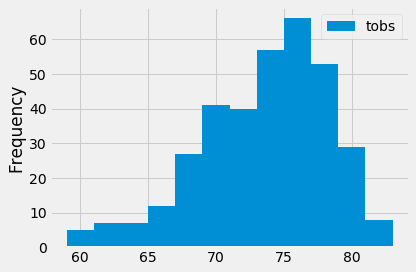

In [44]:
#we want to know what is the temperature distribution, which tempereature happens the most frequent

# Choose the station with the highest number of temperature observations. so we can have the best statistics.

#results = choose-the_column.filter_on_most_active_station.filter_on_dates_since_prev_year

results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

df = pd.DataFrame(results, columns=['tobs'])

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#we justs specify the number of bins, no need to put ranges
df.plot.hist(bins=12)
plt.tight_layout()


In [19]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge